## Input

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
df_test = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

In [3]:
df_train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
df_test.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [5]:
df_train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


## Visualization

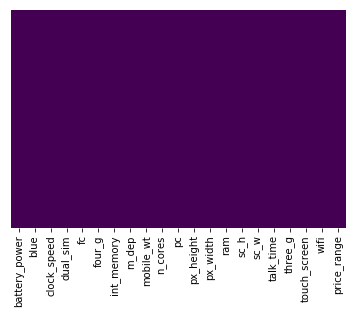

In [7]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df_train.corr()

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

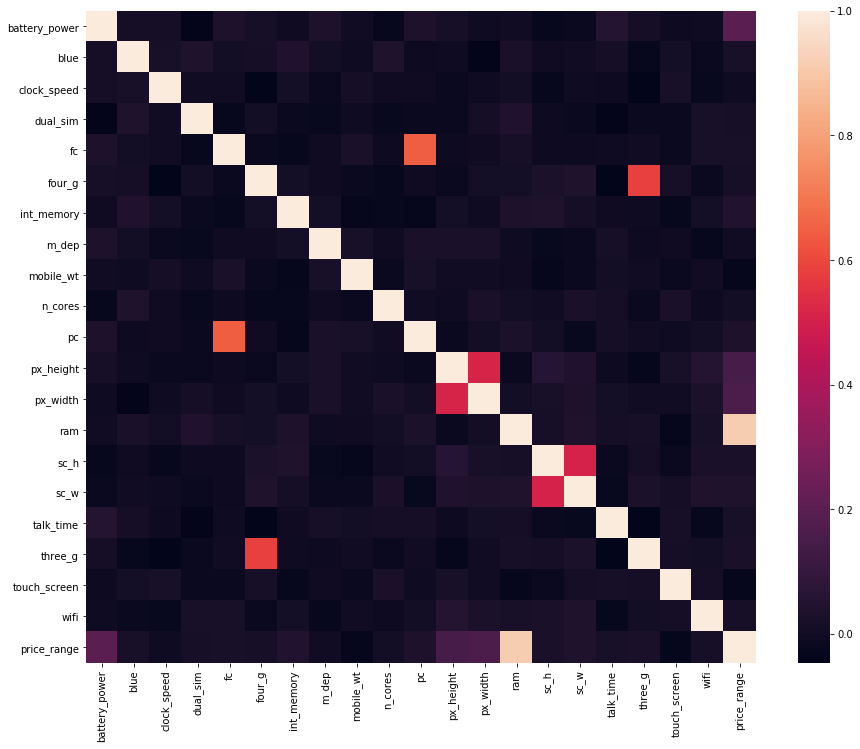

In [9]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(df_train.corr())

In [10]:
df_train['price_range'].unique()

array([1, 2, 3, 0])

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


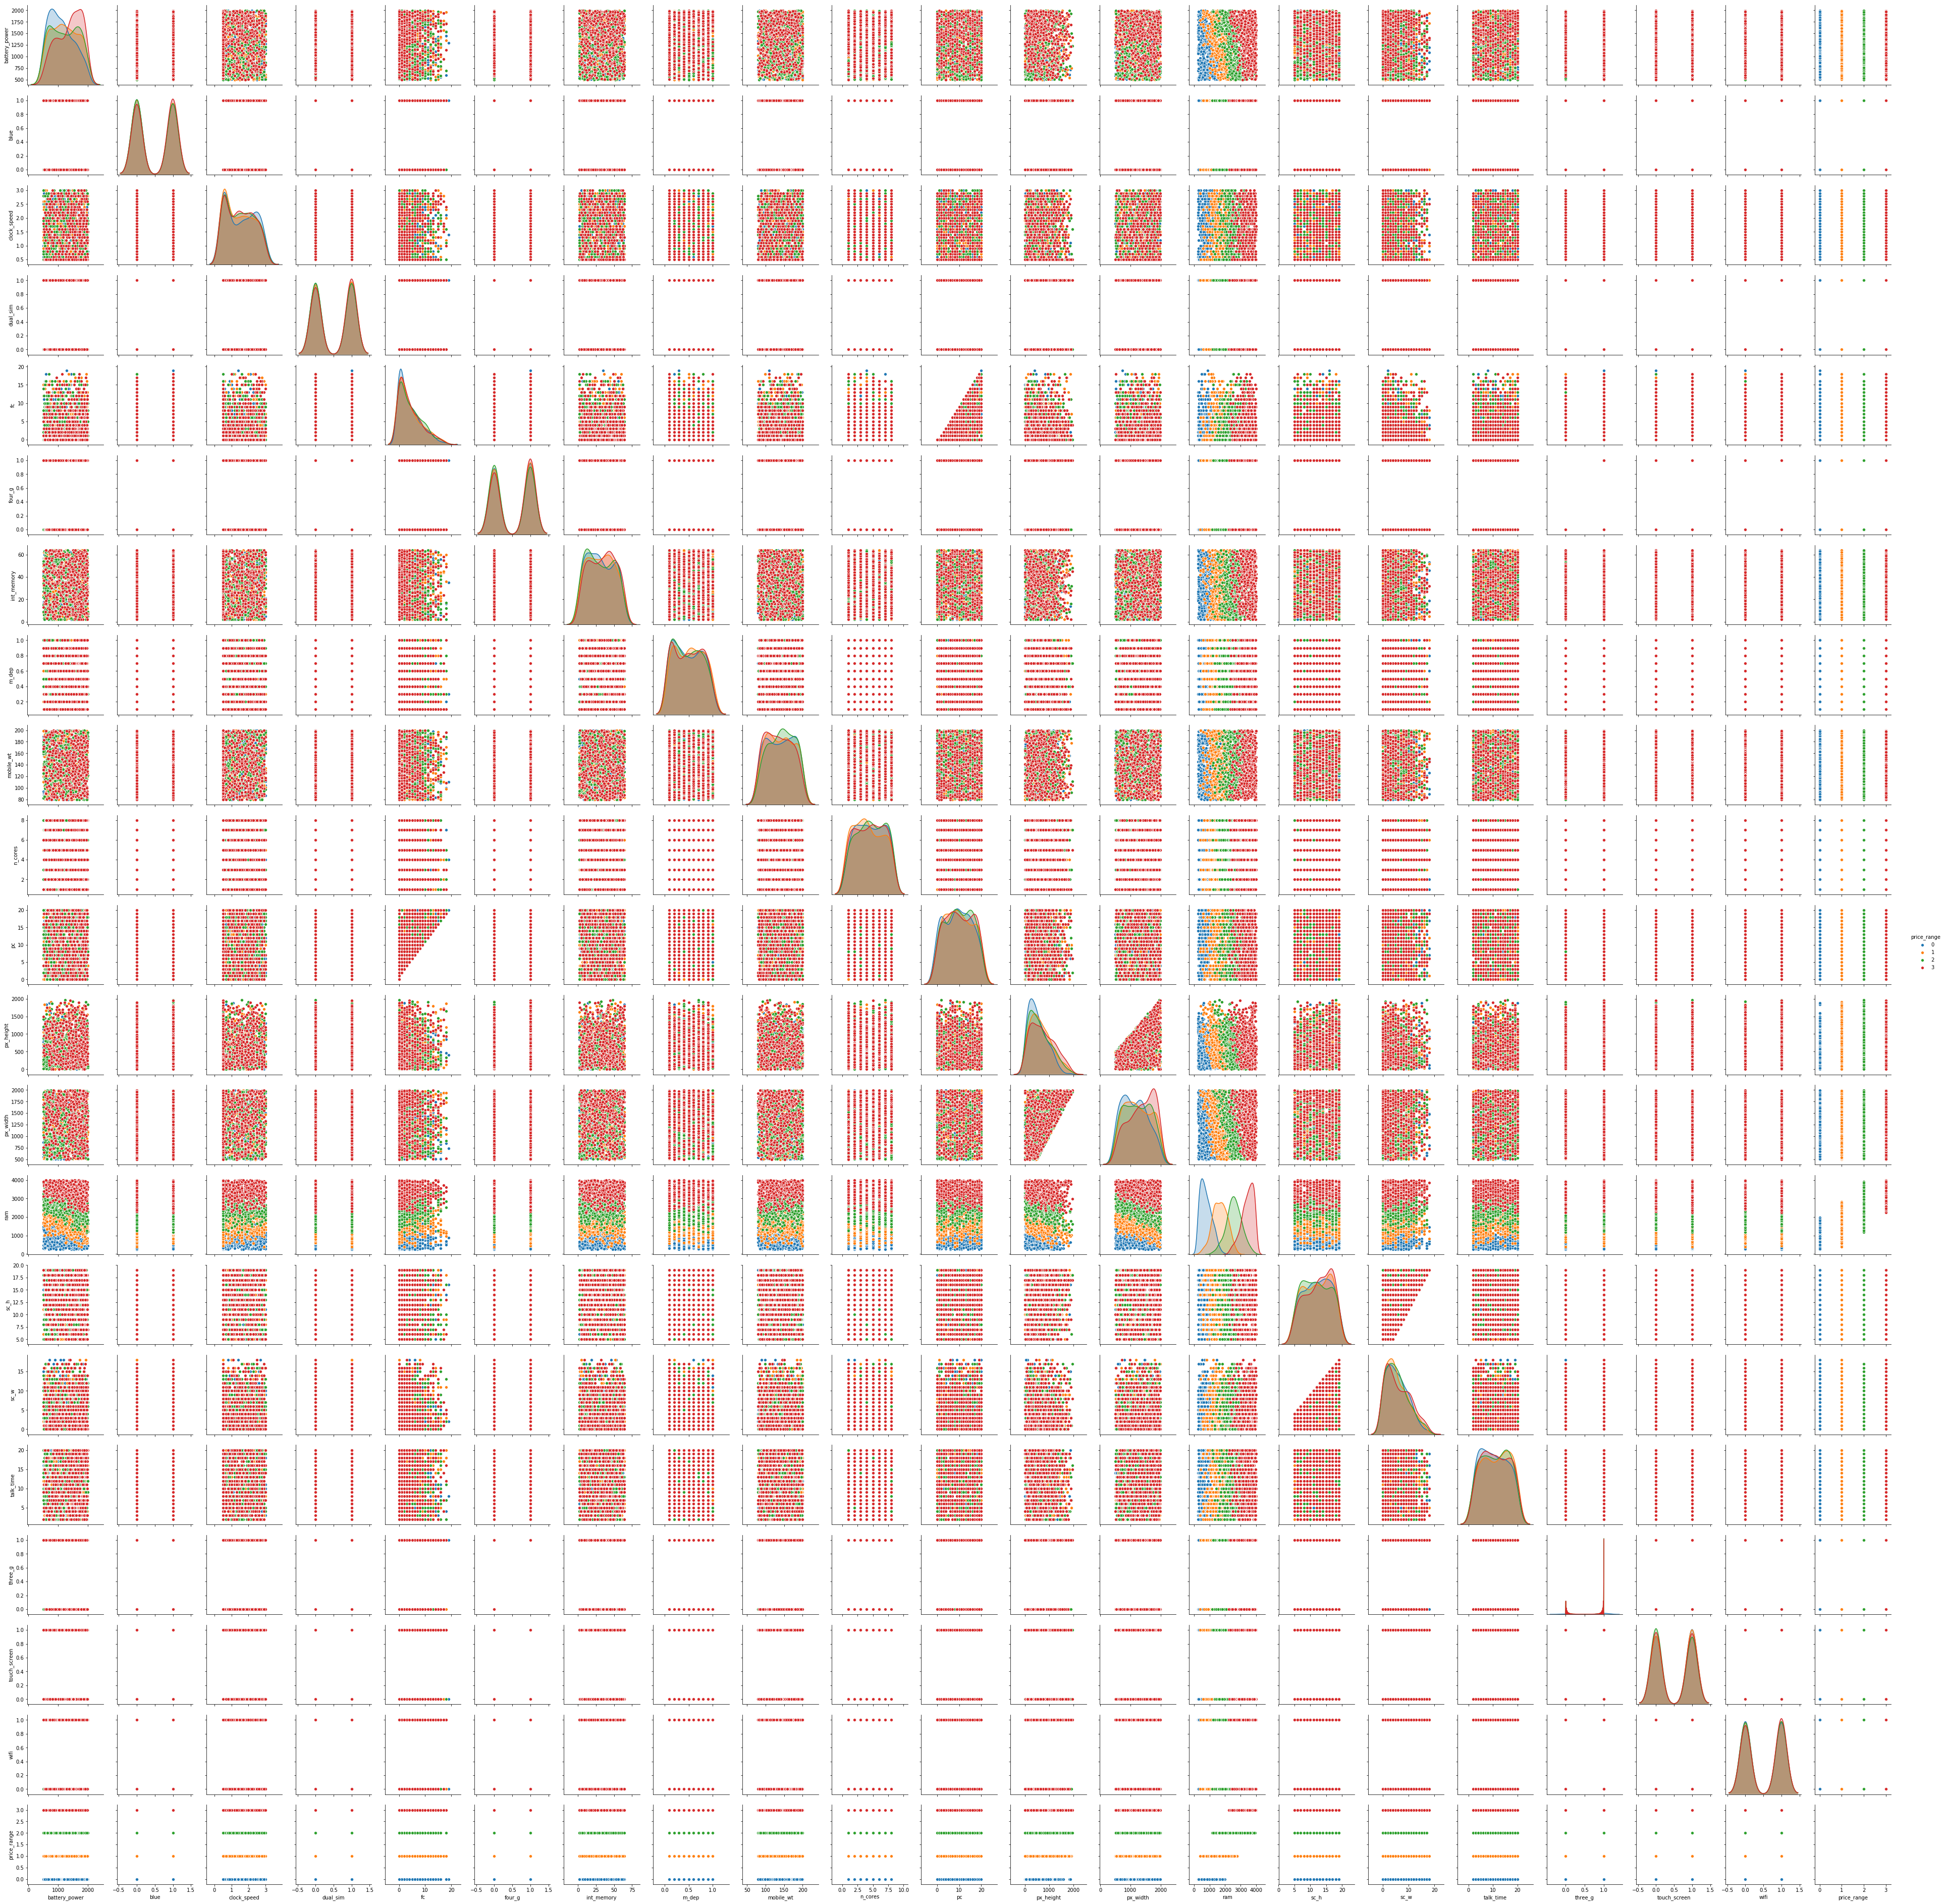

In [11]:
sns.pairplot(df_train,hue='price_range')

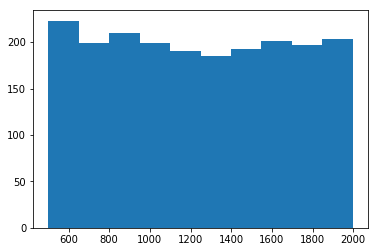

In [12]:
plt.hist(df_train['battery_power'])
plt.show()

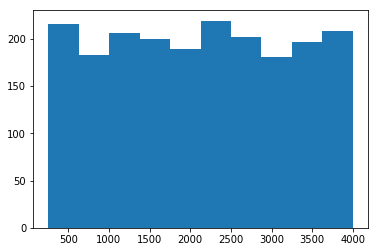

In [13]:
plt.hist(df_train['ram'])
plt.show()

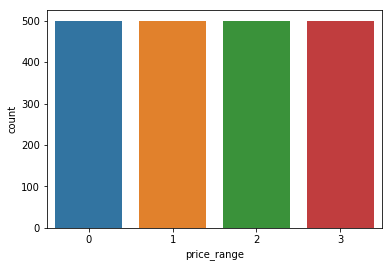

In [14]:
sns.countplot(df_train['price_range'])
plt.show()

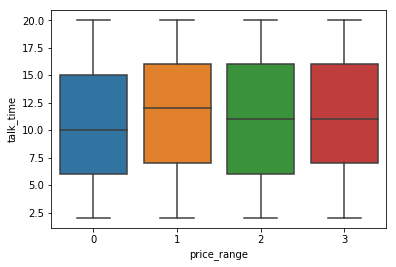

In [15]:
sns.boxplot(df_train['price_range'],df_train['talk_time'])

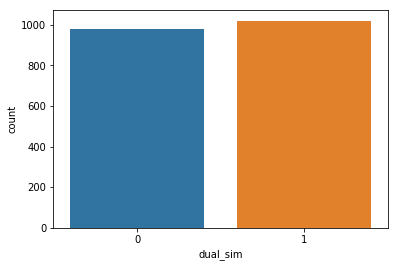

In [16]:
sns.countplot(df_train['dual_sim'])
plt.show()

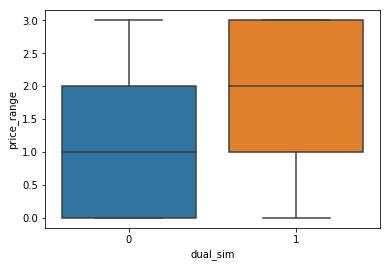

In [17]:
sns.boxplot(df_train['dual_sim'],df_train['price_range'])

(array([551., 116., 168., 138., 203., 127., 202., 136., 184., 175.]),
 array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <a list of 10 Patch objects>)

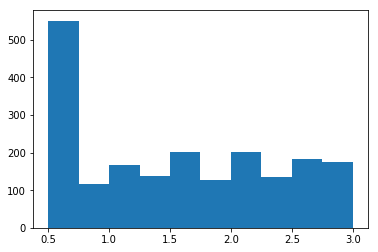

In [18]:
plt.hist(df_train['clock_speed'])

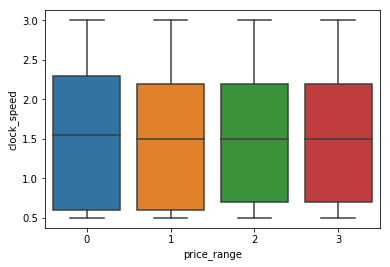

In [19]:
sns.boxplot(df_train['price_range'],df_train['clock_speed'])

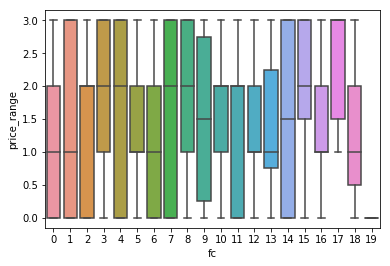

In [20]:
sns.boxplot(df_train['fc'],df_train['price_range'])
plt.show()

In [21]:
df_train['n_cores'].unique()

array([2, 3, 5, 6, 1, 8, 4, 7])

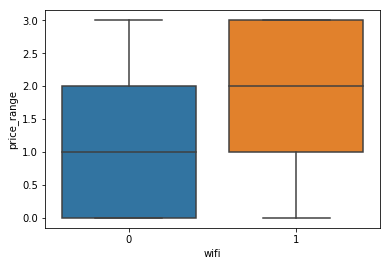

In [22]:
sns.boxplot(df_train['wifi'],df_train['price_range'])
plt.show()

Phones with 3G supported

In [23]:
labels = ["3G-supported",'Not supported']
values = df_train['three_g'].value_counts().values

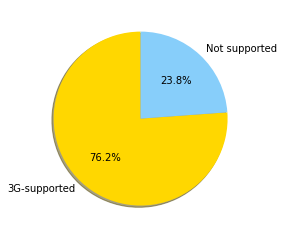

In [24]:
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

Phones with 4G supported

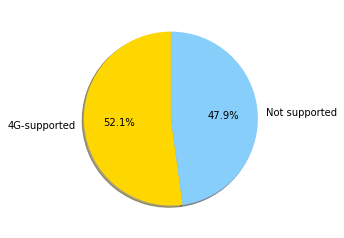

In [25]:
labels = ["4G-supported",'Not supported']
values = df_train['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

Text(0.5, 0, 'MegaPixels')

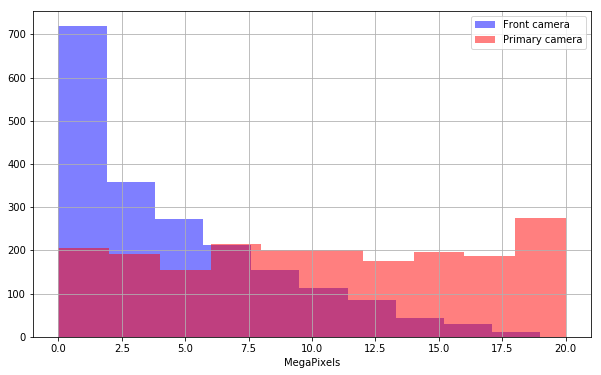

In [26]:
plt.figure(figsize=(10,6))
df_train['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df_train['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = df_train.drop('price_range',axis=1)
y = df_train['price_range']

scaler.fit(x)
x_transformed = scaler.transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.3)

## Linear Regression

In [28]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [29]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lm.score(x_train,y_train)

0.9205286419067241

## Logistic Regression

In [31]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report


model = LogisticRegression()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))


Train Set Accuracy:84.78571428571429
Test Set Accuracy:78.66666666666666

Confusion Matrix:
[[135  28   0   0]
 [  0  88  38   0]
 [  0  45  94   4]
 [  0   0  13 155]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       163
           1       0.55      0.70      0.61       126
           2       0.65      0.66      0.65       143
           3       0.97      0.92      0.95       168

    accuracy                           0.79       600
   macro avg       0.79      0.78      0.78       600
weighted avg       0.81      0.79      0.80       600



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## KNN

In [32]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [33]:
knn.score(x_test,y_test)

0.545

In [34]:
pred = knn.predict(x_test)

In [35]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

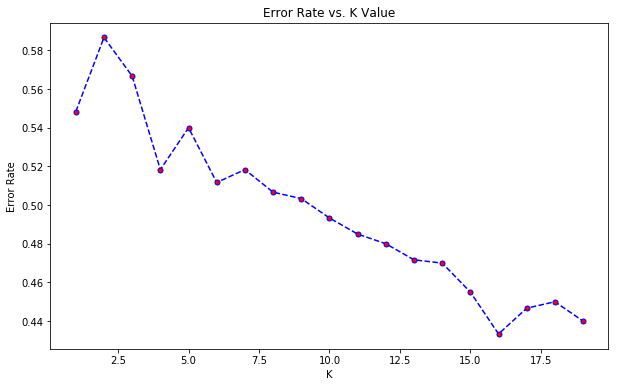

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.62      0.78      0.69       135
           1       0.43      0.39      0.41       161
           2       0.41      0.47      0.44       145
           3       0.76      0.58      0.66       159

    accuracy                           0.55       600
   macro avg       0.56      0.55      0.55       600
weighted avg       0.56      0.55      0.54       600



In [38]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[105  27   3   0]
 [ 57  62  41   1]
 [  8  41  68  28]
 [  0  15  52  92]]


## Decision Tree

In [39]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
dtree.score(x_test,y_test)

0.8333333333333334

## Random Forest

In [41]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
rfc.score(x_test,y_test)

0.8583333333333333

## SVM

In [43]:
#SVM
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred,y_test))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Set Accuracy:98.0
Test Set Accuracy:83.83333333333334

Confusion Matrix:
[[127  21   0   0]
 [  8 126  23   0]
 [  0  14 114  23]
 [  0   0   8 136]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       148
           1       0.78      0.80      0.79       157
           2       0.79      0.75      0.77       151
           3       0.86      0.94      0.90       144

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



## Gradient Boosting

In [44]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:89.0

Confusion Matrix:
[[128  10   0   0]
 [  7 139  15   0]
 [  0  12 118  10]
 [  0   0  12 149]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       138
           1       0.86      0.86      0.86       161
           2       0.81      0.84      0.83       140
           3       0.94      0.93      0.93       161

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600

